# Binary classification
### Generate some train/test data

In [1]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

### Build and train a Keras classifier model as usual

In [2]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/5
20000/20000 [==============================] - 6s 278us/step - loss: 0.3550 - acc: 0.8667
Epoch 2/5
20000/20000 [==============================] - 1s 39us/step - loss: 0.1996 - acc: 0.9346
Epoch 3/5
20000/20000 [==============================] - 1s 35us/step - loss: 0.1853 - acc: 0.9393
Epoch 4/5
20000/20000 [==============================] - 1s 37us/step - loss: 0.1756 - acc: 0.9431
Epoch 5/5
20000/20000 [==============================] - 1s 38us/step - loss: 0.1659 - acc: 0.9480


### Use trained Keras model to predict test inputs and generate ROC data
* fpr: False positive rate
* tpr: True positive rate

False Positive Rate$$
FPR=\frac{FP}
{N}=\frac{FP}
{FP+TN}\\
$$
Where FP is the number of false positives, TN is the number of true negatives and N=FP+TN is the total number of negatives.
True Positive Rate$$
TPR=\frac{TP}
{P}=\frac{TP}
{FN+TP}\\
$$
Where TP is the number of true positives, FN is the number of false negatives and P=FN+TP is the total number of positives.


In [3]:
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

### Calculate AUC (area under curve)

In [4]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

## Train another classifier to compare with Keras model

In [5]:
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

### Plot the ROC curve

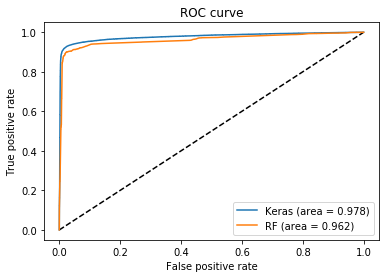

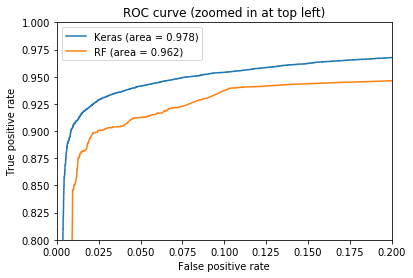

In [6]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## (Optional) Prediction probability density function(PDF)

In [7]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

def plot_pdf(y_pred, y_test, name=None, smooth=500):
    positives = y_pred[y_test == 1]
    negatives = y_pred[y_test == 0]
    N = positives.shape[0]
    n = N//smooth
    s = positives
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    plt.plot(x, f(x))

    N = negatives.shape[0]
    n = N//smooth
    s = negatives
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    plt.plot(x, f(x))
    plt.xlim([0.0, 1.0])
    plt.xlabel('density')
    plt.ylabel('density')
    plt.title('PDF-{}'.format(name))
    plt.show()

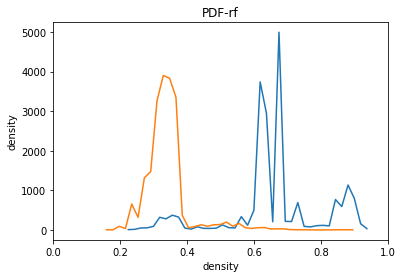

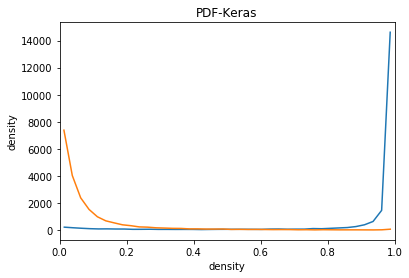

In [8]:
plot_pdf(y_pred_rf, y_test, 'rf')
plot_pdf(y_pred_keras, y_test, 'Keras')

# Multi-class classification

### Generate some train/test data
3 classes to classify

In [9]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize

# 3 classes to classify
n_classes = 3

X, y = make_classification(n_samples=80000, n_features=20, n_informative=3, n_redundant=0, n_classes=n_classes,
    n_clusters_per_class=2)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(y[:2])

[[0 0 1]
 [0 1 0]]


### Build and train Keras model

In [10]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model2 = build_model()
keras_model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
40000/40000 [==============================] - 2s 48us/step - loss: 0.5684 - acc: 0.7848
Epoch 2/10
40000/40000 [==============================] - 2s 43us/step - loss: 0.3803 - acc: 0.8718
Epoch 3/10
40000/40000 [==============================] - 2s 41us/step - loss: 0.3613 - acc: 0.8778
Epoch 4/10
40000/40000 [==============================] - 2s 41us/step - loss: 0.3491 - acc: 0.8816
Epoch 5/10
40000/40000 [==============================] - 2s 40us/step - loss: 0.3387 - acc: 0.8849
Epoch 6/10
40000/40000 [==============================] - 2s 39us/step - loss: 0.3300 - acc: 0.8874
Epoch 7/10
40000/40000 [==============================] - 2s 39us/step - loss: 0.3232 - acc: 0.8896
Epoch 8/10
40000/40000 [==============================] - 2s 38us/step - loss: 0.3166 - acc: 0.8917
Epoch 9/10
40000/40000 [==============================] - 2s 38us/step - loss: 0.3115 - acc: 0.8944
Epoch 10/10
40000/40000 [==============================] - 2s 39us/step - loss: 0.3078 - acc: 0.8953

### Make prediction for test inputs

In [11]:
y_score = keras_model2.predict(X_test)

### Plot ROC for each of the 3 classes

Use micro and marco averaging to evaluate the overall performance across all classes.
$$
precision=PRE=\frac{TP}
{TP+FP}\\
$$
 In “micro averaging”, we’d calculate the performance, e.g., precision, from the individual true positives, true negatives, false positives, and false negatives of the the k-class model:
$$
PRE_{micro}=\frac{TP_{1}+\dots+TP_{k}}
{TP_{1}+\dots+TP_{k}+FP_{1}+\dots+FP_{k}}\\
$$
And in macro-averaging, we average the performances of each individual class:
$$
PRE_{marco}=\frac{PRE_{1}+\dots+PRE_{k}}
{k}\\
$$

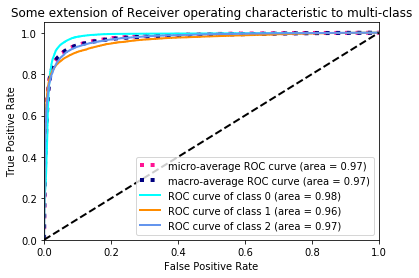

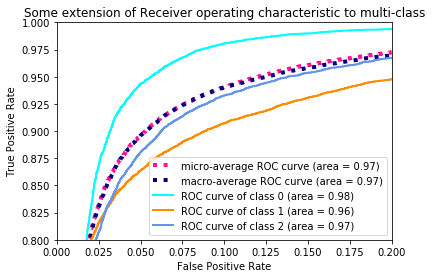

In [12]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()